<a href="https://colab.research.google.com/github/30xintegral/some-pandas-numpy-problems/blob/main/Car_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
install.packages("mice")

library(tidyverse)
library(mice)

raw_data <- read_csv("/content/car_performance_dataset.csv")

glimpse(raw_data)
summary(raw_data)

colSums(is.na(raw_data))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 3000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): engine_size, horsepower, weight, acceleration, top_speed, fuel_effi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 3,000
Columns: 7
$ engine_size     <dbl> 2.25, 1.93, 2.32, 2.76, 1.88, 1.88, 2.79, 2.38, 1.77, …
$ horsepower      <dbl> 106, 103, 133, 194, 121, 93, 175, 120, 122, 129, 105, …
$ weight          <dbl> 1013, 902, 1068, 1326, 920, 1025, 1363, 1033, 997, 105…
$ acceleration    <dbl> 17.61, 18.18, 16.31, 10.62, 15.72, 15.17, 13.87, 17.48…
$ top_speed       <dbl> 64.9, 32.7, 63.3, 96.6, 60.8, 48.3, 93.4, 59.6, 57.4, …
$ fuel_efficiency <dbl> 63.9, 65.5, 55.9, 40.1, 55.8, 64.8, 48.0, 57.7, 53.0, …
$ price           <dbl> 24490, 17470, 30121, 33588, 27507, 20034, 25981, 19798…


  engine_size      horsepower        weight      acceleration  
 Min.   :0.380   Min.   :  9.0   Min.   : -69   Min.   : 8.91  
 1st Qu.:1.690   1st Qu.: 98.0   1st Qu.: 825   1st Qu.:14.71  
 Median :2.010   Median :120.0   Median :1008   Median :15.98  
 Mean   :2.016   Mean   :120.3   Mean   :1008   Mean   :15.96  
 3rd Qu.:2.340   3rd Qu.:143.0   3rd Qu.:1183   3rd Qu.:17.17  
 Max.   :3.960   Max.   :253.0   Max.   :2186   Max.   :22.09  
                 NA's   :60                                    
   top_speed      fuel_efficiency      price      
 Min.   : -4.70   Min.   : 15.60   Min.   :-4973  
 1st Qu.: 48.10   1st Qu.: 51.80   1st Qu.:19070  
 Median : 60.40   Median : 59.90   Median :24564  
 Mean   : 60.54   Mean   : 59.88   Mean   :24510  
 3rd Qu.: 73.80   3rd Qu.: 67.80   3rd Qu.:30277  
 Max.   :132.30   Max.   :100.00   Max.   :55422  
                  NA's   :90                      

engine_size      horsepower          weight    acceleration       top_speed 
              0              60               0               0               0 
fuel_efficiency           price 
             90               0

In [10]:
df= as.data.frame(raw_data)
head(df)

,engine_size,horsepower,weight,acceleration,top_speed,fuel_efficiency,price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.25,106,1013,17.61,64.9,63.9,24490
2,1.93,103,902,18.18,32.7,65.5,17470
3,2.32,133,1068,16.31,63.3,55.9,30121
4,2.76,194,1326,10.62,96.6,40.1,33588
5,1.88,121,920,15.72,60.8,55.8,27507
6,1.88,93,1025,15.17,48.3,64.8,20034


In [11]:
df <- df[apply(df >= 0, 1, all), ]
nrow(df)

[1] 2993

In [12]:
summary(df)
colSums(is.na(raw_data))

  engine_size      horsepower        weight      acceleration  
 Min.   :0.380   Min.   :  9.0   Min.   : 174   Min.   : 8.91  
 1st Qu.:1.690   1st Qu.: 98.0   1st Qu.: 830   1st Qu.:14.72  
 Median :2.010   Median :121.0   Median :1010   Median :15.99  
 Mean   :2.022   Mean   :120.7   Mean   :1011   Mean   :15.96  
 3rd Qu.:2.340   3rd Qu.:143.0   3rd Qu.:1183   3rd Qu.:17.16  
 Max.   :3.960   Max.   :253.0   Max.   :2186   Max.   :22.09  
 NA's   :148     NA's   :148     NA's   :148    NA's   :148    
   top_speed      fuel_efficiency      price      
 Min.   :  1.80   Min.   : 15.60   Min.   :  649  
 1st Qu.: 48.30   1st Qu.: 51.90   1st Qu.:19139  
 Median : 60.50   Median : 59.90   Median :24593  
 Mean   : 60.76   Mean   : 59.84   Mean   :24571  
 3rd Qu.: 73.80   3rd Qu.: 67.70   3rd Qu.:30229  
 Max.   :132.30   Max.   :100.00   Max.   :55422  
 NA's   :148      NA's   :148      NA's   :148    

engine_size      horsepower          weight    acceleration       top_speed 
              0              60               0               0               0 
fuel_efficiency           price 
             90               0

In [13]:
df_lr = df%>%
  mice(method="norm.predict")%>%
  complete()


 iter imp variable
  1   1  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  1   2  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  1   3  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  1   4  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  1   5  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  2   1  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  2   2  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  2   3  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  2   4  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  2   5  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficiency  price
  3   1  engine_size  horsepower  weight  acceleration  top_speed  fuel_efficien

In [15]:
colSums(is.na(df_lr))

engine_size      horsepower          weight    acceleration       top_speed 
              0               0               0               0               0 
fuel_efficiency           price 
              0               0

In [16]:
head(df_lr)

,engine_size,horsepower,weight,acceleration,top_speed,fuel_efficiency,price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.25,106,1013,17.61,64.9,63.9,24490
2,1.93,103,902,18.18,32.7,65.5,17470
3,2.32,133,1068,16.31,63.3,55.9,30121
4,2.76,194,1326,10.62,96.6,40.1,33588
5,1.88,121,920,15.72,60.8,55.8,27507
6,1.88,93,1025,15.17,48.3,64.8,20034


In [17]:
get_cor <- function(df){
  cor_coef <- cor(df$engine_size, df$fuel_efficiency, use = "pairwise.complete.obs")
  cor_label <- paste0("Correlation Coefficient:", round(cor_coef, 2))
  return(cor_label)
}
P1 <- ggplot() + geom_point(data = df, aes(x=engine_size, y=fuel_efficiency), color = "black")+
  labs(title = "Original Data", subtitle = get_cor(df),
x= "engine_size",
y= "fuel_efficiency")

Warning message:
“Removed 148 rows containing missing values or values outside the scale range
(`geom_point()`).”


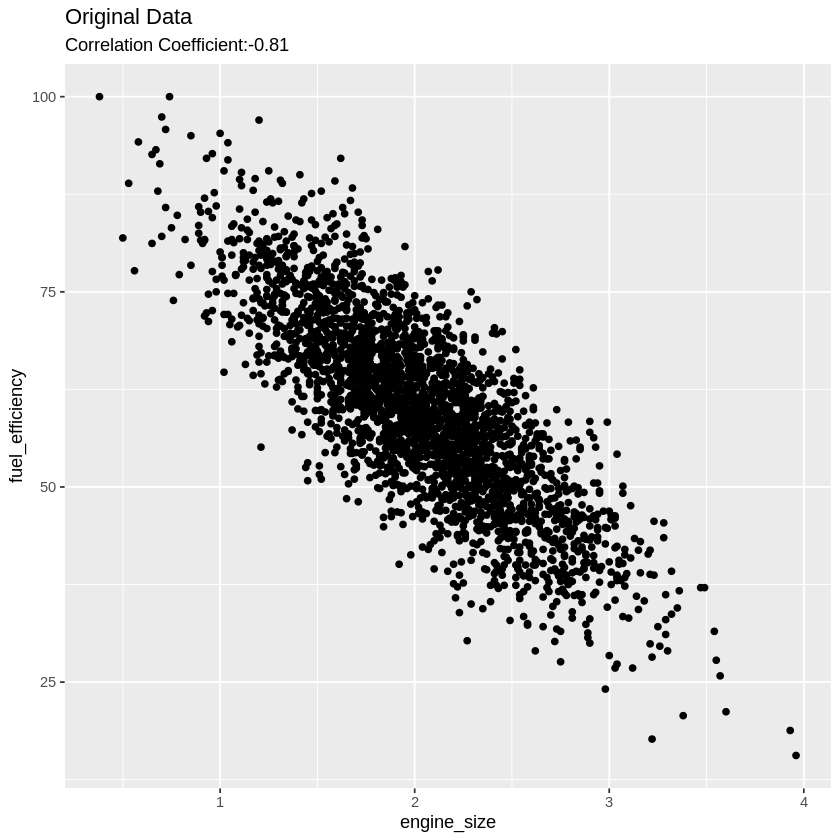

In [18]:
P1

In [22]:
get_cor <- function(df_lr){
  cor_coef <- cor(df_lr$engine_size, df_lr$fuel_efficiency, use = "pairwise.complete.obs")
  cor_label <- paste0("Correlation Coefficient:", round(cor_coef, 2))
  return(cor_label)
}
P1 <- ggplot() + geom_point(data = df_lr, aes(x=engine_size, y=fuel_efficiency), color = "black")+
  labs(title = "Filled Data", subtitle = get_cor(df_lr),
x= "engine_size",
y= "fuel_efficiency")

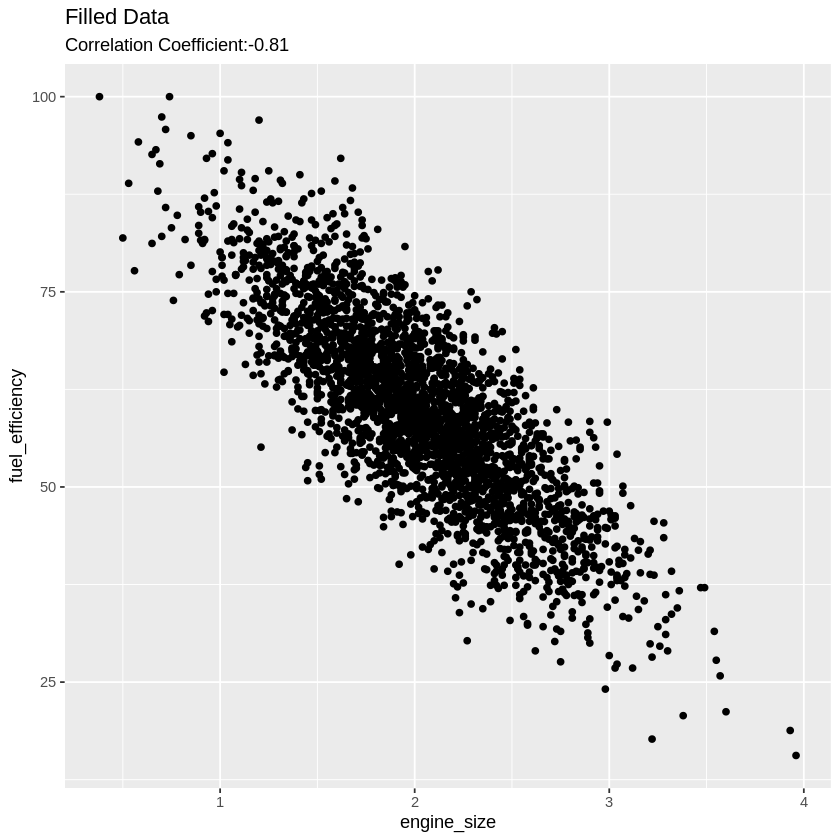

In [23]:
P1

In [24]:
write.csv(df_lr, "cleaned_by_linear_regression.csv", row.names = FALSE)